### Imports

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

### State

In [2]:
class CricketerState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    boundry_percentage: float
    balls_per_boundry: float
    strike_rate: float
    summary: str

### Node Functions

In [3]:
def calculate_boundry_percentage(state: CricketerState) -> CricketerState:
    boundry_percentage = state['fours'] * 4 + state['sixes'] * 6 / state['runs'] * 100
    return {"boundry_percentage": boundry_percentage}

In [4]:
def calculate_balls_per_boundry(state: CricketerState) -> CricketerState:
    balls_per_boundry = state['balls'] / (state['fours'] + state['sixes'])
    return {"balls_per_boundry": balls_per_boundry}

In [5]:
def calaulate_strike_rate(state: CricketerState) -> CricketerState:
    strike_rate = (state['runs'] / state['balls']) * 100
    return {"strike_rate": strike_rate}

In [6]:
def summary(state: CricketerState) -> CricketerState:
    state['summary'] = (
        f"Runs: {state['runs']}, Balls: {state['balls']}, "
        f"Fours: {state['fours']}, Sixes: {state['sixes']}, "
        f"Boundry Percentage: {state['boundry_percentage']:.2f}%, "
        f"Balls per Boundry: {state['balls_per_boundry']:.2f}, "
        f"Strike Rate: {state['strike_rate']:.2f}"
    )
    return state

### Define Graph

In [7]:
graph = StateGraph(CricketerState)

### Add Nodes

In [8]:
graph.add_node("calculate_boundry_percentage", calculate_boundry_percentage)
graph.add_node("calculate_balls_per_boundry", calculate_balls_per_boundry)
graph.add_node("calaulate_strike_rate", calaulate_strike_rate)
graph.add_node("summary", summary)

### Add Edges

In [9]:
graph.add_edge(START, "calculate_boundry_percentage")
graph.add_edge(START, "calculate_balls_per_boundry")
graph.add_edge(START, "calaulate_strike_rate")

graph.add_edge("calculate_boundry_percentage", "summary")
graph.add_edge("calculate_balls_per_boundry", "summary")
graph.add_edge("calaulate_strike_rate", "summary")

graph.add_edge("summary", END)

### Compile Graph

In [10]:
workflow = graph.compile()

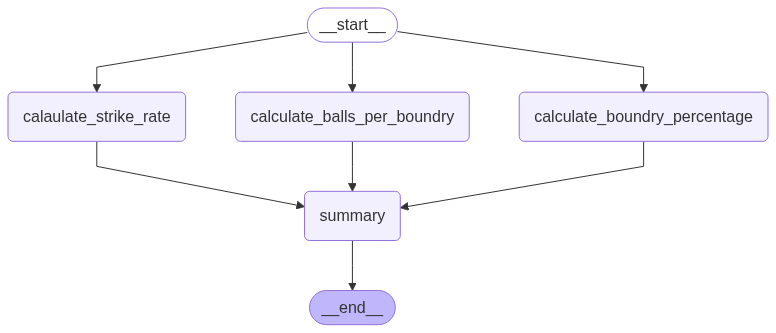

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state = {
    "runs": 100,
    "balls": 50,
    "fours": 6,
    "sixes": 4
}

In [13]:
workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'boundry_percentage': 48.0,
 'balls_per_boundry': 5.0,
 'strike_rate': 200.0,
 'summary': 'Runs: 100, Balls: 50, Fours: 6, Sixes: 4, Boundry Percentage: 48.00%, Balls per Boundry: 5.00, Strike Rate: 200.00'}